In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import fastai.utils.collect_env; fastai.utils.collect_env.show_install(1)



```text
=== Software === 
python        : 3.6.8
fastai        : 1.0.39
fastprogress  : 0.1.18
torch         : 1.0.0
nvidia driver : 396.44
torch cuda    : 9.0.176 / is available
torch cudnn   : 7401 / is enabled

=== Hardware === 
nvidia gpus   : 1
torch devices : 1
  - gpu0      : 8117MB | GeForce GTX 1070

=== Environment === 
platform      : Linux-4.4.0-21-generic-x86_64-with-debian-stretch-sid
distro        : #37-Ubuntu SMP Mon Apr 18 18:33:37 UTC 2016
conda env     : Unknown
python        : /home/ray/anaconda3/envs/fastai-please-work/bin/python
sys.path      : 
/home/ray/anaconda3/envs/fastai-please-work/lib/python36.zip
/home/ray/anaconda3/envs/fastai-please-work/lib/python3.6
/home/ray/anaconda3/envs/fastai-please-work/lib/python3.6/lib-dynload
/home/ray/anaconda3/envs/fastai-please-work/lib/python3.6/site-packages
/home/ray/anaconda3/envs/fastai-please-work/lib/python3.6/site-packages/IPython/extensions
/home/ray/.ipython

Thu Jan 10 20:58:41 2019       
+--------------------

In [3]:
from fastai.vision import *
from fastai.callbacks.hooks import *

In [4]:
torch.cuda.set_device(0)

In [5]:
torch.cuda.is_available()

True

In [6]:
torch.backends.cudnn.enabled

True

In [7]:
path = Path('/home/ray/BDD/bdd100k/seg')
path.ls()

[PosixPath('/home/ray/BDD/bdd100k/seg/color_labels'),
 PosixPath('/home/ray/BDD/bdd100k/seg/tmp'),
 PosixPath('/home/ray/BDD/bdd100k/seg/images'),
 PosixPath('/home/ray/BDD/bdd100k/seg/.ipynb_checkpoints'),
 PosixPath('/home/ray/BDD/bdd100k/seg/train-128'),
 PosixPath('/home/ray/BDD/bdd100k/seg/labels'),
 PosixPath('/home/ray/BDD/bdd100k/seg/models'),
 PosixPath('/home/ray/BDD/bdd100k/seg/codes.txt'),
 PosixPath('/home/ray/BDD/bdd100k/seg/train_masks-128')]

In [8]:
path_lbl = path/'color_labels/train'
path_img = path/'images/train'

In [9]:
fnames = get_image_files(path_img)
fnames[:3]

[PosixPath('/home/ray/BDD/bdd100k/seg/images/train/47406c52-6f9c5dbf.jpg'),
 PosixPath('/home/ray/BDD/bdd100k/seg/images/train/b674bc13-3e309d54.jpg'),
 PosixPath('/home/ray/BDD/bdd100k/seg/images/train/444450f8-eb43d2b7.jpg')]

In [10]:
lbl_names = get_image_files(path_lbl)
lbl_names[:3]

[PosixPath('/home/ray/BDD/bdd100k/seg/color_labels/train/3f8b781f-38cbe876_train_color.png'),
 PosixPath('/home/ray/BDD/bdd100k/seg/color_labels/train/7a0ba545-3961a92c_train_color.png'),
 PosixPath('/home/ray/BDD/bdd100k/seg/color_labels/train/4e8a3e02-00000000_train_color.png')]

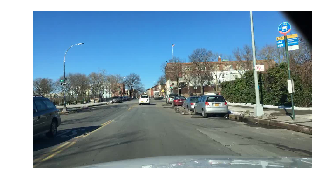

In [11]:
img_f = fnames[0]
img = open_image(img_f)
img.show(figsize=(5,5))

In [12]:
get_y_fn = lambda x: path_lbl/f'{x.stem}_train_color.png'

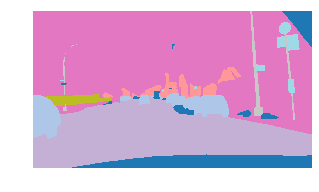

In [13]:
mask = open_mask(get_y_fn(img_f))
mask.show(figsize=(5,5), alpha=1)

In [14]:
src_size = np.array(mask.shape[1:])
src_size,mask.data

(array([ 720, 1280]), tensor([[[117, 117, 117,  ...,   0,   0,   0],
          [117, 117, 117,  ...,   0,   0,   0],
          [117, 117, 117,  ...,   0,   0,   0],
          ...,
          [ 90,  90,  90,  ...,   0,   0,   0],
          [ 90,  90,  90,  ...,   0,   0,   0],
          [ 90,  90,  90,  ...,   0,   0,   0]]]))

In [15]:
codes = np.loadtxt(path/'codes.txt', dtype=str); codes

array(['traffic_light', 'traffic_sign', 'car', 'drivable_area', 'lane', 'person', 'bus', 'truck', 'rider', 'bike',
       'motor', 'train'], dtype='<U13')

# TEST

In [16]:
size = src_size//2
bs=8

In [17]:
src = (SegmentationItemList.from_folder(path_img)
       .split_by_fname_file('valid.txt')
       .label_from_func(get_y_fn, classes=codes))

/home/ray/anaconda3/envs/fastai-please-work/lib/python3.6/site-packages/fastai/data_block.py:391: UserWarning: Your validation set is empty. Is this is by design, use `no_split()` 
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")


In [18]:
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

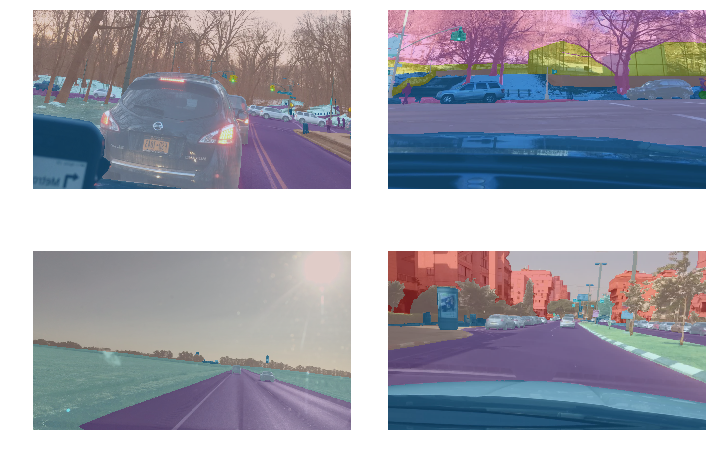

In [19]:
data.show_batch(2, figsize=(10,7))

In [20]:
data.show_batch(2, figsize=(10,7), ds_type=DatasetType.Valid)

IndexError: Traceback (most recent call last):
  File "/home/ray/anaconda3/envs/fastai-please-work/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 138, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/ray/anaconda3/envs/fastai-please-work/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 138, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/ray/anaconda3/envs/fastai-please-work/lib/python3.6/site-packages/fastai/data_block.py", line 544, in __getitem__
    if self.item is None: x,y = self.x[idxs],self.y[idxs]
  File "/home/ray/anaconda3/envs/fastai-please-work/lib/python3.6/site-packages/fastai/data_block.py", line 94, in __getitem__
    if isinstance(idxs, numbers.Integral): return self.get(idxs)
  File "/home/ray/anaconda3/envs/fastai-please-work/lib/python3.6/site-packages/fastai/vision/data.py", line 265, in get
    fn = super().get(i)
  File "/home/ray/anaconda3/envs/fastai-please-work/lib/python3.6/site-packages/fastai/data_block.py", line 59, in get
    return self.items[i]
IndexError: index 0 is out of bounds for axis 0 with size 0
